In [171]:
!pip install --upgrade statsmodels



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [172]:
from statsmodels.tsa.stattools import grangercausalitytests
help(grangercausalitytests)

from statsmodels.tsa.api import VAR

Help on function grangercausalitytests in module statsmodels.tsa.stattools:

grangercausalitytests(x, maxlag, addconst=True, verbose=None)
    Four tests for granger non causality of 2 time series.

    All four tests give similar results. `params_ftest` and `ssr_ftest` are
    equivalent based on F test which is identical to lmtest:grangertest in R.

    Parameters
    ----------
    x : array_like
        The data for testing whether the time series in the second column Granger
        causes the time series in the first column. Missing values are not
        supported.
    maxlag : {int, Iterable[int]}
        If an integer, computes the test for all lags up to maxlag. If an
        iterable, computes the tests only for the lags in maxlag.
    addconst : bool
        Include a constant in the model.
    verbose : bool
        Print results. Deprecated

        .. deprecated: 0.14

           verbose is deprecated and will be removed after 0.15 is released



    Returns
    -------


In [173]:
import statsmodels.api as sm

In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [219]:
Consumer_confidence = pd.read_excel("C:\\Git_test\\Project 2 Docs\\Data Sets\\CCI_transformed.xlsx")

In [248]:
CPIH = pd.read_excel("C:\\Git_test\\Project 2 Docs\\Data Sets\\CPI_ons_data_transformed_CPIH_all.xlsx")
CPIH

,Inflation_rate_quarterly,Inflation_rate_base_points_quarterly,Inflation_rate_acceleration_quarterly
0,0.13,-1.66,NaN
1,0.16,0.08,0.03
2,0.03,0.49,-0.13
3,0.08,1.09,0.05
4,-0.01,0.33,-0.09
5,0.19,2.30,0.20
6,0.17,3.61,-0.02
7,0.24,5.59,0.07
8,0.17,6.93,-0.07
9,0.26,10.29,0.09


In [221]:
Unemployment_rate = pd.read_excel(r"C:\Git_test\Project 2 Docs\Unemployment_rate_cleaned.xlsx")

In [222]:
Total_consumer_spend = pd.read_excel("C:\\Git_test\\Project 2 Docs\\Data Sets\\Consumer_Spend_Transformed.xlsx")

In [179]:
Total_consumer_spend 

,Time Period,Total Expenditure,Net Tourism,Total Domestic Expenditure,Food And Drink,"Alcohol, Tobacco And Narcotics",Clothing And Footwear,Housing,"Furnishings, Household Equipment And Routine Maintenance Of The House",Health,Transport,Communication,Recreation And Culture,Education,Restaurants And Hotels,Miscellaneous,Total Actual Expenditure
0,2015-01-01,284109,1532,282577,22867,9687,12672,82024,12517,6095,38565,6006,26228,5788,26856,33272,357145
1,2015-04-01,291768,2467,289301,22803,9604,14670,77399,12864,6142,40784,5909,27866,5940,30435,34885,367511
2,2015-07-01,304643,6754,297889,22809,9785,15219,76762,13244,6204,46368,6156,27712,6079,33162,34389,379535
3,2015-10-01,307511,801,306710,23966,10662,19206,80946,15707,6675,37991,7060,30054,6209,31037,37197,381329
4,2016-01-01,296024,1975,294049,23659,9306,13372,85184,13074,6467,40829,6645,26676,6332,27523,34982,369527
5,2016-04-01,306475,3809,302666,24099,9546,15281,81289,13298,6459,42373,6752,27963,6437,32118,37051,385787
6,2016-07-01,321169,8331,312838,24483,9717,15863,80063,13787,6661,47769,7055,27917,6530,35249,37744,402679
7,2016-10-01,325677,1739,323938,25865,10753,20008,85233,16169,6933,39445,8372,31158,6608,33250,40144,406628
8,2017-01-01,307646,2008,305638,24778,9658,13809,85683,14045,6754,42630,6716,28440,6674,29885,36566,384355
9,2017-04-01,318842,4288,314554,26057,10326,15489,81466,14663,6915,43204,6884,30312,6744,34144,38350,401766


In [234]:
Total_consumer_spend ['Spending_Change'] = (Total_consumer_spend ['Total Expenditure'].pct_change() * 100)
Total_consumer_spend['Spending_Change'].fillna(0, inplace=True)
Total_consumer_spend ['Spending_Drop'] = (Total_consumer_spend ['Spending_Change'] < 0).astype(int)
Total_consumer_spend ['Spending_Change']

C:\Users\David\AppData\Local\Temp\ipykernel_9364\651216317.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Total_consumer_spend['Spending_Change'].fillna(0, inplace=True)


0      0.000000
1      2.695796
2      4.412753
3      0.941430
4     -3.735476
5      3.530457
6      4.794518
7      1.403622
8     -5.536467
9      3.639248
10     3.667647
11     2.120495
12    -5.176791
13     3.074318
14     3.868619
15     2.451601
16    -6.463576
17     4.371724
18     2.733859
19     0.939766
20    -9.102522
21   -21.150477
22    20.470997
23     2.860373
24    -8.800580
25    13.034552
26     5.309384
27     6.032707
28    -3.478141
29     8.346331
30     2.646919
31     6.138747
32    -4.525702
33     4.291154
34     0.915539
35     1.746436
36    -3.996881
37     4.277473
38     2.584732
39     1.602361
40    -4.037035
Name: Spending_Change, dtype: float64

In [231]:
Total_consumer_spend

,Time Period,Total Expenditure,Net Tourism,Total Domestic Expenditure,Food And Drink,"Alcohol, Tobacco And Narcotics",Clothing And Footwear,Housing,"Furnishings, Household Equipment And Routine Maintenance Of The House",Health,Transport,Communication,Recreation And Culture,Education,Restaurants And Hotels,Miscellaneous,Total Actual Expenditure
0,2015-01-01,284109,1532,282577,22867,9687,12672,82024,12517,6095,38565,6006,26228,5788,26856,33272,357145
1,2015-04-01,291768,2467,289301,22803,9604,14670,77399,12864,6142,40784,5909,27866,5940,30435,34885,367511
2,2015-07-01,304643,6754,297889,22809,9785,15219,76762,13244,6204,46368,6156,27712,6079,33162,34389,379535
3,2015-10-01,307511,801,306710,23966,10662,19206,80946,15707,6675,37991,7060,30054,6209,31037,37197,381329
4,2016-01-01,296024,1975,294049,23659,9306,13372,85184,13074,6467,40829,6645,26676,6332,27523,34982,369527
5,2016-04-01,306475,3809,302666,24099,9546,15281,81289,13298,6459,42373,6752,27963,6437,32118,37051,385787
6,2016-07-01,321169,8331,312838,24483,9717,15863,80063,13787,6661,47769,7055,27917,6530,35249,37744,402679
7,2016-10-01,325677,1739,323938,25865,10753,20008,85233,16169,6933,39445,8372,31158,6608,33250,40144,406628
8,2017-01-01,307646,2008,305638,24778,9658,13809,85683,14045,6754,42630,6716,28440,6674,29885,36566,384355
9,2017-04-01,318842,4288,314554,26057,10326,15489,81466,14663,6915,43204,6884,30312,6744,34144,38350,401766


In [235]:
Total_consumer_spend ['Spending_Change'].shape

(41,)

In [249]:
CPIH['Inflation_rate_quarterly'].shape

(41,)

In [250]:
CPIH['Inflation_rate_quarterly']

0     0.13
1     0.16
2     0.03
3     0.08
4    -0.01
5     0.19
6     0.17
7     0.24
8     0.17
9     0.26
10    0.25
11    0.21
12    0.03
13    0.26
14    0.24
15    0.14
16   -0.02
17    0.29
18    0.15
19    0.03
20    0.04
21    0.04
22    0.14
23    0.05
24    0.08
25    0.53
26    0.29
27    0.67
28    0.53
29    1.15
30    0.49
31    0.80
32    0.41
33    0.66
34    0.18
35    0.12
36    0.27
37    0.35
38    0.13
39    0.39
40    0.25
Name: Inflation_rate_quarterly, dtype: float64

In [251]:
correlations = {}
for lag_quater in range(0,11):
    lagged_cpih = CPIH['Inflation_rate_quarterly'].shift(lag_quater)
    correlate = Total_consumer_spend['Spending_Change'].corr(lagged_cpih)
    correlations['lag_quater'] = correlate
    print(f"Lag {lag_quater:2d} Quater:Correlation = {correlate:+.3f}")

Lag  0 Quater:Correlation = +0.387
Lag  1 Quater:Correlation = +0.052
Lag  2 Quater:Correlation = +0.130
Lag  3 Quater:Correlation = -0.183
Lag  4 Quater:Correlation = +0.121
Lag  5 Quater:Correlation = +0.046
Lag  6 Quater:Correlation = -0.056
Lag  7 Quater:Correlation = -0.232
Lag  8 Quater:Correlation = +0.114
Lag  9 Quater:Correlation = -0.018
Lag 10 Quater:Correlation = -0.128


In [187]:
Total_consumer_spend['Spending_Change'].shape

(41,)

In [223]:
Unemployment_rate_prepped = Unemployment_rate.drop(Unemployment_rate.index[41:])


In [189]:
Unemployment_rate_prepped['Unemployment_Rate'].shape

(41,)

In [252]:
Results = grangercausalitytests(
    pd.concat([Total_consumer_spend['Spending_Change'], CPIH['Inflation_rate_quarterly']], axis=1).dropna(),
    maxlag=13
)

for lag in range(1, 13):
     p = Results[lag][0]['ssr_ftest'][1]

print(p)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9218  , p=0.3432  , df_denom=37, df_num=1
ssr based chi2 test:   chi2=0.9965  , p=0.3181  , df=1
likelihood ratio test: chi2=0.9843  , p=0.3211  , df=1
parameter F test:         F=0.9218  , p=0.3432  , df_denom=37, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.4348  , p=0.1028  , df_denom=34, df_num=2
ssr based chi2 test:   chi2=5.5856  , p=0.0612  , df=2
likelihood ratio test: chi2=5.2201  , p=0.0735  , df=2
parameter F test:         F=2.4348  , p=0.1028  , df_denom=34, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=4.7551  , p=0.0077  , df_denom=31, df_num=3
ssr based chi2 test:   chi2=17.4866 , p=0.0006  , df=3
likelihood ratio test: chi2=14.3851 , p=0.0024  , df=3
parameter F test:         F=4.7551  , p=0.0077  , df_denom=31, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=3.1872  , p=0.0281  , df_d

In [224]:
Results = grangercausalitytests(
    pd.concat([Unemployment_rate_prepped['Unemployment_Rate'], Consumer_confidence['Consumer Confidence']], axis=1).dropna(),
    maxlag=6
)

for lag in range(1, 6):
     p = Results[lag][0]['ssr_ftest'][1]

print(p)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=8.0860  , p=0.0072  , df_denom=37, df_num=1
ssr based chi2 test:   chi2=8.7416  , p=0.0031  , df=1
likelihood ratio test: chi2=7.9061  , p=0.0049  , df=1
parameter F test:         F=8.0860  , p=0.0072  , df_denom=37, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=6.2039  , p=0.0050  , df_denom=34, df_num=2
ssr based chi2 test:   chi2=14.2325 , p=0.0008  , df=2
likelihood ratio test: chi2=12.1332 , p=0.0023  , df=2
parameter F test:         F=6.2039  , p=0.0050  , df_denom=34, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.4835  , p=0.0274  , df_denom=31, df_num=3
ssr based chi2 test:   chi2=12.8101 , p=0.0051  , df=3
likelihood ratio test: chi2=11.0393 , p=0.0115  , df=3
parameter F test:         F=3.4835  , p=0.0274  , df_denom=31, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=3.0428  , p=0.0335  , df_d

In [253]:
CPIH

,Inflation_rate_quarterly,Inflation_rate_base_points_quarterly,Inflation_rate_acceleration_quarterly
0,0.13,-1.66,NaN
1,0.16,0.08,0.03
2,0.03,0.49,-0.13
3,0.08,1.09,0.05
4,-0.01,0.33,-0.09
5,0.19,2.30,0.20
6,0.17,3.61,-0.02
7,0.24,5.59,0.07
8,0.17,6.93,-0.07
9,0.26,10.29,0.09


In [267]:
Results = grangercausalitytests(
    pd.concat([Total_consumer_spend['Spending_Change'], CPIH['Inflation_rate_acceleration_quarterly']], axis=1).dropna(),
    maxlag=12
)

for lag in range(1, 13):
     p = Results[lag][0]['ssr_ftest'][1]

print(p)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0002  , p=0.9903  , df_denom=36, df_num=1
ssr based chi2 test:   chi2=0.0002  , p=0.9898  , df=1
likelihood ratio test: chi2=0.0002  , p=0.9898  , df=1
parameter F test:         F=0.0002  , p=0.9903  , df_denom=36, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=6.0737  , p=0.0057  , df_denom=33, df_num=2
ssr based chi2 test:   chi2=13.9879 , p=0.0009  , df=2
likelihood ratio test: chi2=11.9101 , p=0.0026  , df=2
parameter F test:         F=6.0737  , p=0.0057  , df_denom=33, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=4.1349  , p=0.0144  , df_denom=30, df_num=3
ssr based chi2 test:   chi2=15.2990 , p=0.0016  , df=3
likelihood ratio test: chi2=12.8042 , p=0.0051  , df=3
parameter F test:         F=4.1349  , p=0.0144  , df_denom=30, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.6161  , p=0.0573  , df_d

In [255]:
Combined = pd.concat([Total_consumer_spend['Spending_Change'], CPIH['Inflation_rate_quarterly'], Unemployment_rate_prepped['Unemployment_Rate']], axis=1).dropna()

In [256]:
print(f"Data shape: {Combined.shape}")
print(f"Column names: {Combined.columns.tolist()}")
print(Combined.head())

Data shape: (41, 3)
Column names: ['Spending_Change', 'Inflation_rate_quarterly', 'Unemployment_Rate']
   Spending_Change  Inflation_rate_quarterly  Unemployment_Rate
0         0.000000                      0.13                5.5
1         2.695796                      0.16                5.5
2         4.412753                      0.03                5.5
3         0.941430                      0.08                4.9
4        -3.735476                     -0.01                5.1


When including Consumer Confidence data I noticed the P Value increased significantly to 0.04 compaired to the 0.005 value and I've checked the causality values with are low at lag 2 against Consumer confidence alone, but OLS shows the degree in which it affects it is is negligable.

In [259]:

model = VAR(Combined)

best_aic = float('inf')
best_lag = None
best_results = None


for lag in range(1, 5):
    result = model.fit(maxlags=lag)
    if result.aic < best_aic:
        best_aic = result.aic
        best_lag = lag
        best_results = result

print(f"Best lag by AIC: {best_lag}")

granger_result = best_results.test_causality(
    'Spending_Change',
    ['Inflation_rate_quarterly', 'Unemployment_Rate'],
    kind='f'
)

print(f"Granger p-value (inflation + unemployment → spending): {granger_result.pvalue}")

Best lag by AIC: 3
Granger p-value (inflation + unemployment → spending): 0.0051430504056574925


In [260]:
IRF = best_results.irf(3)

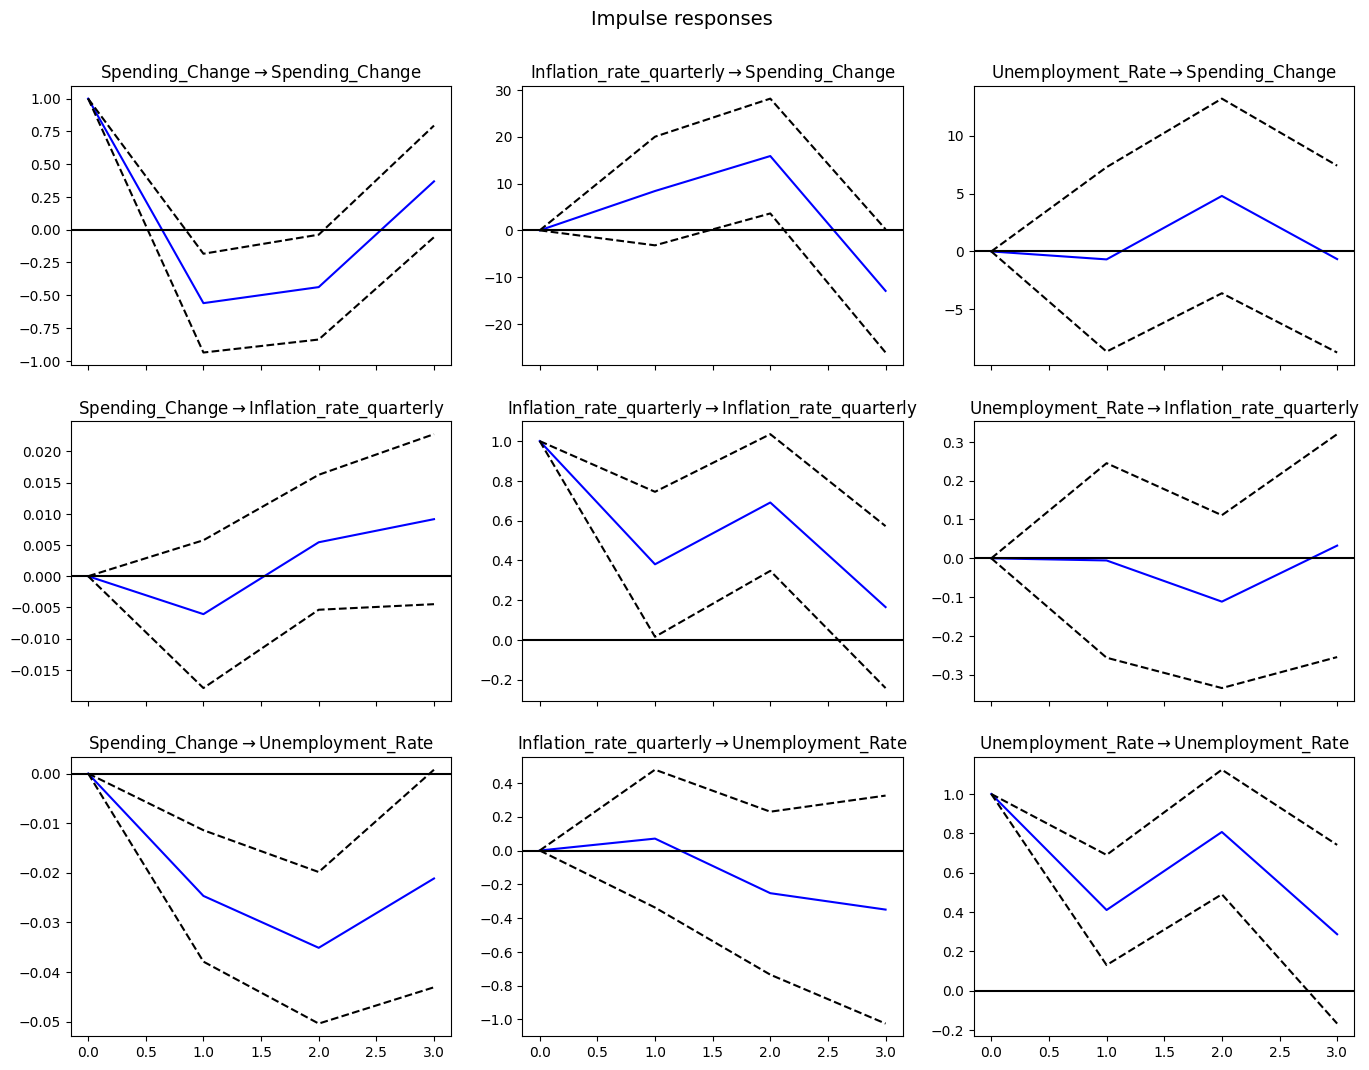

In [261]:
plt.close('all')
IRF.plot(orth=False, figsize=(14,11))
plt.tight_layout(pad=2)



In [ ]:
df['Recessional Warning Dial'] = 0

for i in range(4):
    spend_down = Total_consumer_spend['Spending_Change'].iloc[-4+i] < -0.05
    infl_up = CPIH['CPI_acceleration_mean'].iloc[-4+i] > 0.5
    unemp_up = Unemployment_rate_prepped['Unemployment_Rate'].iloc[-4+i] > 0.5
    df['Recessional Warning Dial'] += (spend_down + infl_up + unemp_up)

In [262]:
CPIH['Inflation_rate_quarterly4'] = CPIH['Inflation_rate_quarterly'].shift(4)

In [263]:
Spending_copy = pd.DataFrame()
Spending_copy['Spending_Change'] = Total_consumer_spend['Spending_Change'].copy()
Spending_copy['Spending_Change'].iloc[0:3] = np.nan

C:\Users\David\AppData\Local\Temp\ipykernel_9364\3794997934.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  Spending_copy['Spending_Change'].iloc[0:3] = np.nan


In [264]:
CPIH_COPY = pd.DataFrame()
CPIH_COPY['Inflation_rate_quarterly3'] = CPIH['Inflation_rate_quarterly'].copy()
CPIH_COPY['Inflation_rate_quarterly3'].shift(3)

0      NaN
1      NaN
2      NaN
3     0.13
4     0.16
5     0.03
6     0.08
7    -0.01
8     0.19
9     0.17
10    0.24
11    0.17
12    0.26
13    0.25
14    0.21
15    0.03
16    0.26
17    0.24
18    0.14
19   -0.02
20    0.29
21    0.15
22    0.03
23    0.04
24    0.04
25    0.14
26    0.05
27    0.08
28    0.53
29    0.29
30    0.67
31    0.53
32    1.15
33    0.49
34    0.80
35    0.41
36    0.66
37    0.18
38    0.12
39    0.27
40    0.35
Name: Inflation_rate_quarterly3, dtype: float64

In [225]:
Consumer_confidence_copy = pd.DataFrame()
Consumer_confidence_copy['Consumer Confidence 2'] = Consumer_confidence['Consumer Confidence'].copy()
Consumer_confidence_copy['Consumer Confidence 2'].shift(2)

0       NaN
1       NaN
2     101.0
3     101.0
4     100.3
5     100.0
6      99.7
7      99.0
8      99.7
9     100.0
10    101.0
11    101.0
12    100.7
13    100.0
14    100.0
15     99.7
16     98.7
17     98.0
18     97.0
19     97.0
20     97.0
21     97.3
22     97.3
23     90.0
24     98.7
25     97.3
26     99.0
27    101.0
28    101.7
29    100.7
30     99.0
31     96.3
32     95.0
33     95.0
34     96.3
35     97.7
36     98.3
37     99.0
38     99.7
39    100.0
40    100.0
Name: Consumer Confidence 2, dtype: float64

In [245]:
model = sm.OLS(Spending_copy['Spending_Change'], sm.add_constant(Consumer_confidence_copy['Consumer Confidence 2']), missing='drop').fit()
print(model.params[1])

1.153576645171096


C:\Users\David\AppData\Local\Temp\ipykernel_9364\1559246750.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(model.params[1])


In [265]:
model = sm.OLS(Spending_copy['Spending_Change'], sm.add_constant(CPIH_COPY['Inflation_rate_quarterly3']), missing='drop').fit()
print(model.params[1])

11.245454475474537


C:\Users\David\AppData\Local\Temp\ipykernel_9364\3834992404.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(model.params[1])


In [ ]:
Spending_copy2 = pd.DataFrame()
Spending_copy2['Spending_Change'] = Total_consumer_spend['Spending_Change'].copy()
Spending_copy2['Spending_Change'].iloc[0:10] = np.nan

C:\Users\David\AppData\Local\Temp\ipykernel_36932\3135341755.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  Spending_copy2['Spending_Change'].iloc[0:10] = np.nan


In [ ]:
CPIH_COPY['Inflation_rate_acceleration_quarterl4'] = CPIH['Inflation_rate_acceleration_quarterly'].copy()
CPIH_COPY['Inflation_rate_acceleration_quarterl'].shift(4)

0           NaN
1           NaN
2           NaN
3           NaN
4     -0.551667
5      0.027000
6      0.162667
7      0.362333
8      0.110000
9      0.768333
10     1.204000
11     1.862333
12     2.310000
13     3.431000
14     3.940000
15     4.680333
16     4.841667
17     5.752333
18     6.329000
19     6.899667
20     6.729000
21     7.821667
22     8.222667
23     8.440333
24     8.512000
25     8.682333
26     9.079000
27     9.261000
28     9.458667
29    10.929333
30    11.989333
31    14.080333
32    15.519667
33    19.747000
34    21.770000
35    24.794000
36    25.865000
37    28.940000
38    29.486333
39    30.269333
40    30.822000
Name: Inflation_rate_mean4, dtype: float64

In [ ]:
print(Results[1])

({'ssr_ftest': (0.0010950299939202475, 0.9737797029499551, 37.0, 1), 'ssr_chi2test': (0.001183816209643511, 0.9725528963767988, 1), 'lrtest': (0.0011837986922955679, 0.9725530993696889, 1), 'params_ftest': (0.0010950299939093222, 0.9737797029500534, 37.0, 1.0)}, [<statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000256420618E0>, <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000256434440B0>, array([[0., 1., 0.]])])


In [270]:

CPIH['Inflation_rate_quarterly'] = CPIH['Inflation_rate_quarterly'].copy()
CPIH['Inflation_rate_quarterly3'] = CPIH['Inflation_rate_quarterly'].shift(3)

CPIH['Inflation_rate_quarterly3']


0      NaN
1      NaN
2      NaN
3     0.13
4     0.16
5     0.03
6     0.08
7    -0.01
8     0.19
9     0.17
10    0.24
11    0.17
12    0.26
13    0.25
14    0.21
15    0.03
16    0.26
17    0.24
18    0.14
19   -0.02
20    0.29
21    0.15
22    0.03
23    0.04
24    0.04
25    0.14
26    0.05
27    0.08
28    0.53
29    0.29
30    0.67
31    0.53
32    1.15
33    0.49
34    0.80
35    0.41
36    0.66
37    0.18
38    0.12
39    0.27
40    0.35
Name: Inflation_rate_quarterly3, dtype: float64

In [ ]:
CPIH.to_excel("C:\\Git_test\\Project 2 Docs\\Data Sets\\CPIH_Inlfation_stats_and_lag.xlsx", index=False)
